In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a,data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2022-02-18,159.899994,4348.870117
2022-02-22,157.929993,4304.759766
2022-02-23,155.960007,4225.500000
2022-02-24,151.759995,4288.700195
2022-02-25,158.240005,4384.649902


In [22]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,42.240330,1132.989990
2010-01-05,42.254154,1136.520020
2010-01-06,42.053726,1137.140015
2010-01-07,41.825665,1141.689941
2010-01-08,41.770382,1144.979980


<AxesSubplot:xlabel='Date'>

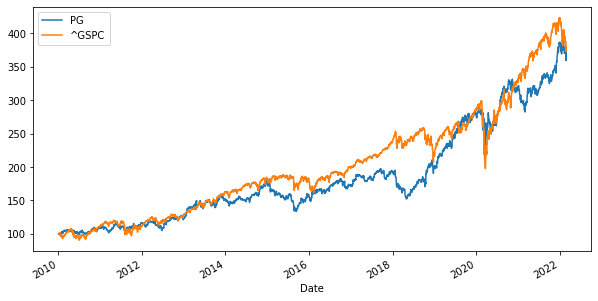

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [9]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [10]:
log_returns.mean() * 250

PG       0.107974
^GSPC    0.110632
dtype: float64

In [11]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.028658,0.016734
^GSPC,0.016734,0.029630


In [12]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.574273
^GSPC,0.574273,1.000000


In [15]:
num_assets = len(assets)

In [16]:
num_assets

2

In [17]:
arr = np.random.random(2)
arr

array([0.78455658, 0.79705834])

In [23]:
arr[0] + arr[1]

1.5816149251224063

In [20]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.19513854, 0.80486146])

In [21]:
weights[0] + weights[1]

0.9999999999999999

Expected Portfolio Return:

In [27]:
np.sum(weights * log_returns.mean()) * 250

0.11011324856690588

Expected Portfolio Variance

In [28]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.025541859197374558

Expected Portfolio Volatility:

In [30]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.15981820671429947

In [40]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.11025094481513015,
  0.11044937345561291,
  0.11058512460384741,
  0.10818993715671985,
  0.10932156199125775,
  0.10853319807067092,
  0.11000499486421392,
  0.10961292258356768,
  0.10881610660889748,
  0.1091904798491772,
  0.10917026760716561,
  0.10847333582754352,
  0.1099730246007971,
  0.10823576150096136,
  0.11011524879279028,
  0.10938713216274155,
  0.10959047194718326,
  0.10926893731162575,
  0.10932489065322112,
  0.10928290294574546,
  0.11027056730823037,
  0.10949718628256103,
  0.10929156066242264,
  0.10885146484389337,
  0.10942506755473008,
  0.10966697014367066,
  0.10895311480444758,
  0.1098759539357158,
  0.10943455456055508,
  0.10844437448603192,
  0.10913807275560634,
  0.1099858900879656,
  0.109277594543847,
  0.10949943448563312,
  0.10942381480067383,
  0.10905684892920242,
  0.10990411996137814,
  0.10939959401026217,
  0.10829965361020179,
  0.10852867873323263,
  0.10803492048565522,
  0.10857077704627145,
  0.10941595675282849,
  0.1088180510157

In [64]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
     
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10977082, 0.1090262 , 0.10884935, 0.10971036, 0.10912914,
        0.10934652, 0.10944405, 0.10939492, 0.10815235, 0.10876976,
        0.10940759, 0.10955122, 0.10954532, 0.10926506, 0.11017153,
        0.10973949, 0.10955459, 0.10933972, 0.10946229, 0.10943262,
        0.10927119, 0.10853494, 0.1101631 , 0.10866373, 0.1081496 ,
        0.10935475, 0.1105263 , 0.11040817, 0.10990861, 0.11054993,
        0.10868537, 0.10968254, 0.10982971, 0.10976   , 0.10915297,
        0.10906223, 0.10975835, 0.10890039, 0.10803139, 0.10890248,
        0.11044545, 0.11005763, 0.10999616, 0.10904322, 0.10980927,
        0.11009408, 0.10921143, 0.11034598, 0.10877047, 0.10827881,
        0.10892541, 0.10972222, 0.10887542, 0.10913863, 0.10938816,
        0.10868847, 0.10993292, 0.10845928, 0.10824215, 0.10995821,
        0.10927595, 0.11000881, 0.10913859, 0.10877426, 0.10945451,
        0.11056647, 0.10982837, 0.10959698, 0.11004465, 0.10991566,
        0.11025425, 0.10981587, 0.10898979, 0.10

In [42]:
portfolios = pd.DataFrame({'Returns': pfolio_returns, 'volatility': pfolio_volatilities})
portfolios.head()

,Returns,volatility
0,0.110251,0.162612
1,0.110449,0.167258
2,0.110585,0.170831
3,0.108190,0.163962
4,0.109322,0.151482


In [43]:
portfolios.tail()

,Returns,volatility
995,0.109431,0.151801
996,0.109201,0.151453
997,0.109011,0.152088
998,0.110459,0.167509
999,0.108243,0.162777


Text(0, 0.5, 'Expected Returns')

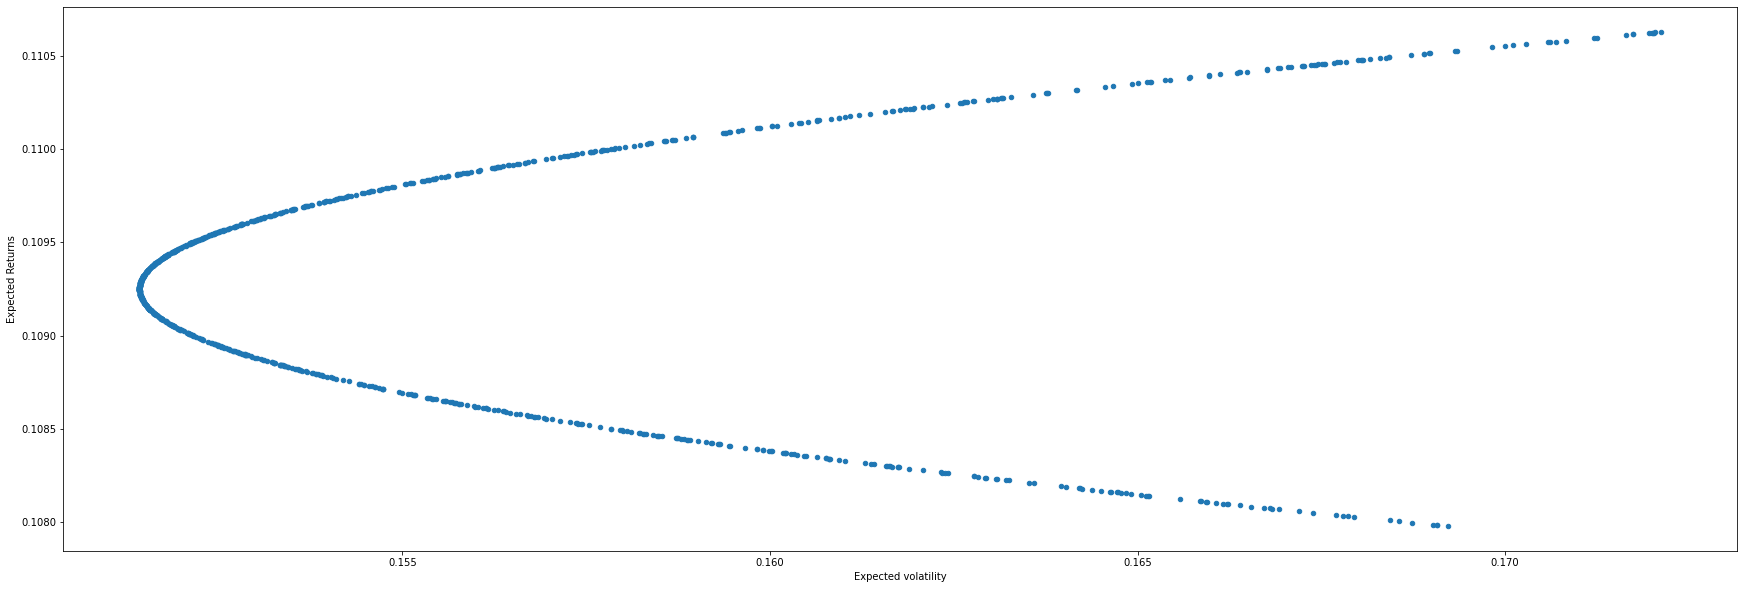

In [76]:
portfolios.plot(x='volatility', y='Returns', kind='scatter', figsize=(30, 10));
plt.xlabel('Expected volatility')
plt.ylabel('Expected Returns')